In [1]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score


In [60]:
def convert_num(datframe, col_name):
    datframe[col_name] = datframe[col_name].convert_objects(convert_numeric=True)
def remove_per(col, dataframes):
    dataframes[col] = dataframes[col].map(lambda x:x.rstrip('%'))
def convert_num(datframe, col_name):
    datframe[col_name] = datframe[col_name].convert_objects(convert_numeric=True)

In [3]:
DATA_PATH_SAT = "/home/xiaohang/Desktop/59970/project/data science new topic/SAT_Results.csv"
DATA_PATH_ATT = "/home/xiaohang/Desktop/59970/project/data science new topic/School_Attendance_and_Enrollment_Statistics_by_District__2010-11.csv"
DATA_PATH_OUTC = "/home/xiaohang/Desktop/59970/project/data science new topic/Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv"
DATA_PATH_SIZE = "/home/xiaohang/Desktop/59970/project/data science new topic/2010-2011_Class_Size_-_School-level_detail.csv"
DATA_PATH_Sch = '/home/xiaohang/Desktop/59970/project/data science new topic/School_Progress_Report_2010-2011.csv'

In [4]:
r_sat = pd.read_csv(DATA_PATH_SAT)
r_att = pd.read_csv(DATA_PATH_ATT)
r_outc = pd.read_csv(DATA_PATH_OUTC)
r_sch_grade = pd.read_csv(DATA_PATH_Sch)
r_size = pd.read_csv(DATA_PATH_SIZE)

In [5]:
print(r_sat.dtypes,
r_att.dtypes,
r_outc.dtypes,
r_sch_grade.dtypes, 
r_size.dtypes)

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object District                  object
YTD % Attendance (Avg)    object
YTD Enrollment(Avg)        int64
dtype: object Demographic                           object
DBN                                   object
School Name                           object
Cohort                                object
Total Cohort                           int64
Total Grads - n                       object
Total Grads - % of cohort             object
Total Regents - n                     object
Total Regents - % of cohort           object
Total Regents - % of grads            object
Advanced Regents - n                  object
Advanced Regents - % of cohort        object
Advanced Regents - % of grads         object
Regents w/o Advanced - n            

## SAT data clean

In [129]:
sub_sat = r_sat.loc[:, {"DBN", 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score'}]
sub_sat.head()

,SAT Writing Avg. Score,SAT Math Avg. Score,SAT Critical Reading Avg. Score,DBN
0,363,404,355,01M292
1,366,423,383,01M448
2,370,402,377,01M450
3,359,401,414,01M458
4,384,433,390,01M509


In [130]:
convert_num(sub_sat, 'SAT Math Avg. Score')
convert_num(sub_sat, 'SAT Writing Avg. Score')
convert_num(sub_sat, 'SAT Critical Reading Avg. Score')
sub_sat['SAT Avg. Score']= sub_sat.sum(axis = 1)
sub_sat.head()

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,SAT Writing Avg. Score,SAT Math Avg. Score,SAT Critical Reading Avg. Score,DBN,SAT Avg. Score
0,363.0,404.0,355.0,01M292,1122.0
1,366.0,423.0,383.0,01M448,1172.0
2,370.0,402.0,377.0,01M450,1149.0
3,359.0,401.0,414.0,01M458,1174.0
4,384.0,433.0,390.0,01M509,1207.0


## ATTENDANCE data clean

In [131]:
sub_att = r_att.loc[:, {'District','YTD % Attendance (Avg)'}]
sub_att['District']= r_att.apply(lambda x: x['District'].replace('DISTRICT ', ''), axis=1)
sub_att = sub_att.drop([33,34])
remove_per('YTD % Attendance (Avg)', sub_att)
sub_att = sub_att.rename(columns={'YTD % Attendance (Avg)':'Attendance_Avg.'})
sub_att.head()

,Attendance_Avg.,District
0,91.18,01
1,89.01,02
2,89.28,03
3,91.13,04
4,89.08,05


## GRADUATED PERCENTAGE data clean

In [132]:
sub_outc = r_outc[r_outc['Cohort'] == '2006']
sub_outc = sub_outc.loc[:, {'DBN','Total Grads - % of cohort'}]
sub_outc = sub_outc.dropna()
remove_per('Total Grads - % of cohort', sub_outc)
sub_outc = sub_outc.rename(columns={'Total Grads - % of cohort':'Percentage of Grads'})
sub_outc.head()

,Percentage of Grads,DBN
3,55.1,01M292
10,42.7,01M448
17,77.8,01M450
24,56,01M509
31,54.4,01M515


## SCHOOL GRADE data clean

In [133]:
r_sch_grade = r_sch_grade[r_sch_grade["SCHOOL LEVEL*"] == "High School"]
sub_sch_grade = r_sch_grade.loc[:, {'DBN',
                                 'PEER INDEX*',
                                 '2010-2011 OVERALL GRADE',
                                 '2010-2011 ENVIRONMENT GRADE',
                                 '2010-2011 PERFORMANCE GRADE',
                                 '2010-2011 PROGRESS GRADE'}]
sub_sch_grade = sub_sch_grade.rename(columns={'\ufeffDBN':'DBN'})
sub_sch_grade.dropna()
print(len(sub_sch_grade))

sub_sch_grade.head()

426


,2010-2011 PERFORMANCE GRADE,DBN,2010-2011 OVERALL GRADE,2010-2011 PROGRESS GRADE,PEER INDEX*,2010-2011 ENVIRONMENT GRADE
14,C,01M292,C,C,1.81,D
23,C,01M448,C,B,2.03,D
25,A,01M450,A,B,2.26,A
27,B,01M509,C,C,1.78,D
30,A,01M539,A,A,3.48,C


## SCHOOL SIZE data clean

In [134]:
def add_DBN_to_class(row):
    dbn = "{0:02d}{1}".format(row["CSD"], row["SCHOOL CODE"])
    return dbn
temp_size = r_size[r_size["GRADE "] == '09-12']
temp_size = temp_size[r_size["PROGRAM TYPE"] == 'GEN ED']
sub_cl_size = temp_size.loc[:, {'CSD','BOROUGH','SCHOOL CODE', 'AVERAGE CLASS SIZE'}]
sub_cl_size["DBN"] = sub_cl_size.apply(add_DBN_to_class, axis=1)
sub_cl_size = sub_cl_size.dropna()
sub_cl_size = sub_cl_size.drop(['CSD', 'BOROUGH', 'SCHOOL CODE'], 1)
sub_cl_size = sub_cl_size.drop_duplicates()
sub_cl_size = sub_cl_size.groupby("DBN").agg(np.mean)
sub_cl_size = sub_cl_size.reset_index()
sub_cl_size['District'] = sub_cl_size.apply(lambda x: x['DBN'][0:2], axis=1)
sub_cl_size.head()

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,DBN,AVERAGE CLASS SIZE,District
0,01M292,22.564286,01
1,01M332,22.000000,01
2,01M378,33.000000,01
3,01M448,22.046667,01
4,01M450,21.142857,01


## MERGE ALL DATASETS

In [135]:
comb =  pd.merge(sub_att, sub_cl_size, how='inner', on='District')

In [136]:
comb2 = pd.merge(sub_outc, sub_sat, how='inner', on='DBN')
comb3 = pd.merge(sub_sch_grade, comb, how='inner', on='DBN')
comb_final = pd.merge(comb2, comb3, how='inner', on='DBN')
comb_final = comb_final[comb_final['Percentage of Grads'] != 's']
print(len(comb_final))
comb_final.head()

2447


,Percentage of Grads,DBN,SAT Writing Avg. Score,SAT Math Avg. Score,SAT Critical Reading Avg. Score,SAT Avg. Score,2010-2011 PERFORMANCE GRADE,2010-2011 OVERALL GRADE,2010-2011 PROGRESS GRADE,PEER INDEX*,2010-2011 ENVIRONMENT GRADE,Attendance_Avg.,District,AVERAGE CLASS SIZE
0,55.1,01M292,363.0,404.0,355.0,1122.0,C,C,C,1.81,D,91.18,01,22.564286
2,54.8,01M292,363.0,404.0,355.0,1122.0,C,C,C,1.81,D,91.18,01,22.564286
4,63.3,01M292,363.0,404.0,355.0,1122.0,C,C,C,1.81,D,91.18,01,22.564286
6,66.7,01M292,363.0,404.0,355.0,1122.0,C,C,C,1.81,D,91.18,01,22.564286
7,40.5,01M292,363.0,404.0,355.0,1122.0,C,C,C,1.81,D,91.18,01,22.564286


In [137]:
comb_final.columns

Index(['Percentage of Grads', 'DBN', 'SAT Writing Avg. Score',
       'SAT Math Avg. Score', 'SAT Critical Reading Avg. Score',
       'SAT Avg. Score', '2010-2011 PERFORMANCE GRADE',
       '2010-2011 OVERALL GRADE', '2010-2011 PROGRESS GRADE', 'PEER INDEX*',
       '2010-2011 ENVIRONMENT GRADE', 'Attendance_Avg.', 'District',
       'AVERAGE CLASS SIZE'],
      dtype='object')

In [138]:
comb_final.dtypes

Percentage of Grads                 object
DBN                                 object
SAT Writing Avg. Score             float64
SAT Math Avg. Score                float64
SAT Critical Reading Avg. Score    float64
SAT Avg. Score                     float64
2010-2011 PERFORMANCE GRADE         object
2010-2011 OVERALL GRADE             object
2010-2011 PROGRESS GRADE            object
PEER INDEX*                        float64
2010-2011 ENVIRONMENT GRADE         object
Attendance_Avg.                     object
District                            object
AVERAGE CLASS SIZE                 float64
dtype: object

In [139]:
grade_dict = {'A': 5,
              'B': 4,
              'C': 3,
              'D': 2,
              'F': 1,}
comb_final = comb_final.replace(to_replace={'2010-2011 OVERALL GRADE': grade_dict, '2010-2011 PERFORMANCE GRADE': grade_dict,
       '2010-2011 OVERALL GRADE': grade_dict, '2010-2011 PROGRESS GRADE': grade_dict, 
       '2010-2011 ENVIRONMENT GRADE': grade_dict})

In [140]:
convert_num(comb_final, 'Percentage of Grads')
convert_num(comb_final, '2010-2011 PERFORMANCE GRADE')
convert_num(comb_final, '2010-2011 OVERALL GRADE')
convert_num(comb_final, '2010-2011 PROGRESS GRADE')
convert_num(comb_final, '2010-2011 ENVIRONMENT GRADE')
convert_num(comb_final, 'Attendance_Avg.')
convert_num(comb_final, 'AVERAGE CLASS SIZE')

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [141]:
comb_final.dtypes

Percentage of Grads                float64
DBN                                 object
SAT Writing Avg. Score             float64
SAT Math Avg. Score                float64
SAT Critical Reading Avg. Score    float64
SAT Avg. Score                     float64
2010-2011 PERFORMANCE GRADE        float64
2010-2011 OVERALL GRADE            float64
2010-2011 PROGRESS GRADE           float64
PEER INDEX*                        float64
2010-2011 ENVIRONMENT GRADE        float64
Attendance_Avg.                    float64
District                            object
AVERAGE CLASS SIZE                 float64
dtype: object

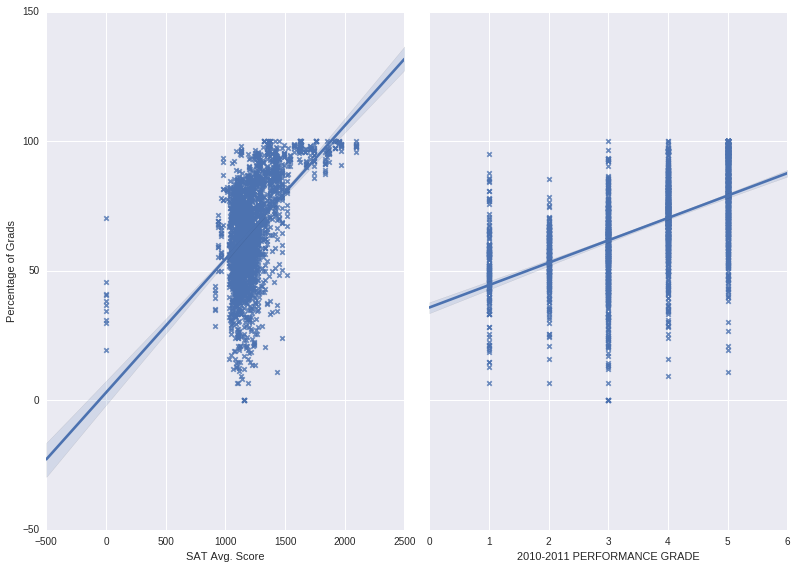

In [142]:
sns.pairplot(comb_final, x_vars=['SAT Avg. Score', '2010-2011 PERFORMANCE GRADE'],
             y_vars='Percentage of Grads', size=8, aspect = 0.7, kind='reg', markers = 'x')

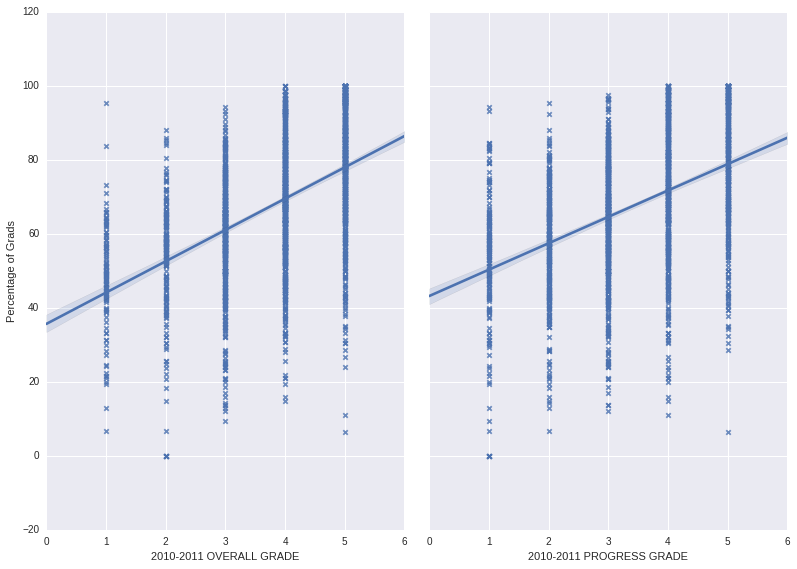

In [143]:
sns.pairplot(comb_final, x_vars=['2010-2011 OVERALL GRADE', '2010-2011 PROGRESS GRADE'],
             y_vars='Percentage of Grads', size=8, aspect = 0.7,kind='reg', markers = 'x')

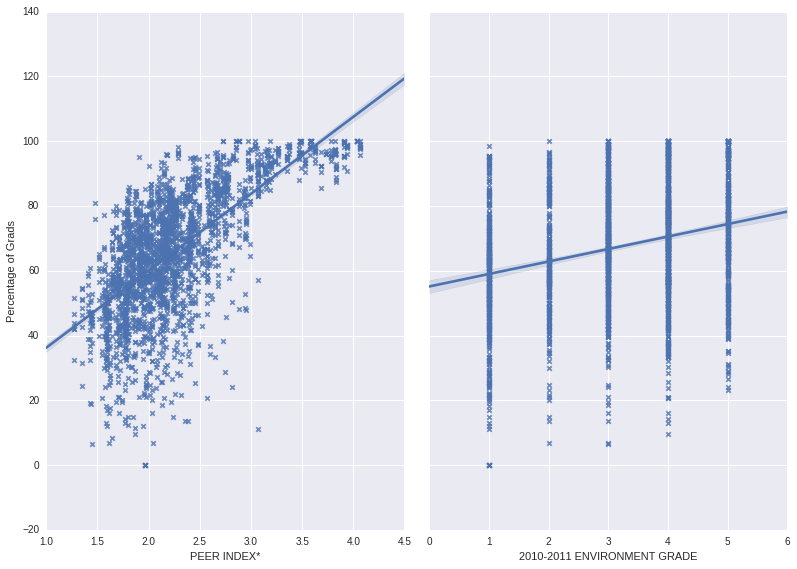

In [144]:
sns.pairplot(comb_final, x_vars=['PEER INDEX*',
       '2010-2011 ENVIRONMENT GRADE'],
             y_vars='Percentage of Grads', size=8, aspect = 0.7,kind='reg', markers = 'x')

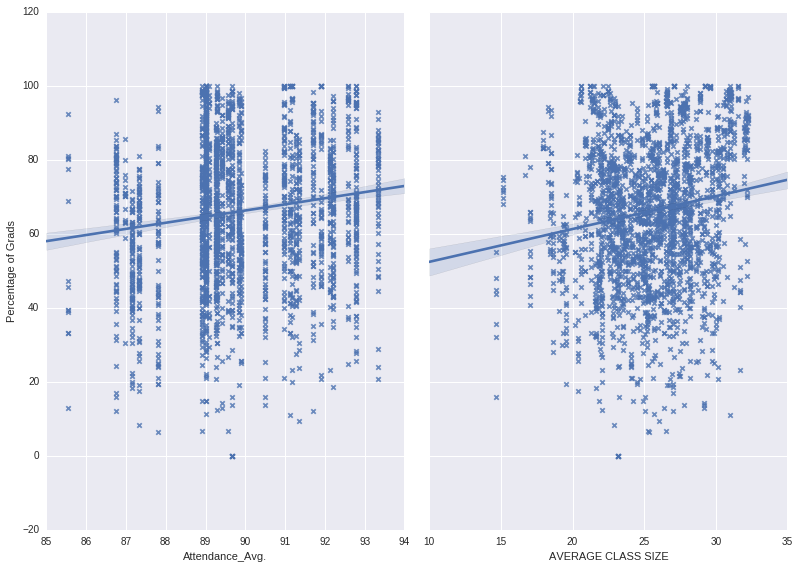

In [145]:
sns.pairplot(comb_final, x_vars=['Attendance_Avg.',
       'AVERAGE CLASS SIZE'],markers = 'x',
             y_vars='Percentage of Grads', size=8, aspect = 0.7,  kind='reg')

## REGRESSION

In [ ]:
feature_cols = ['Percentage of Grads', 'DBN', 'SAT Writing Avg. Score',
       'SAT Math Avg. Score', 'SAT Critical Reading Avg. Score',
       'SAT Avg. Score', '2010-2011 PERFORMANCE GRADE',
       '2010-2011 OVERALL GRADE', '2010-2011 PROGRESS GRADE', 'PEER INDEX*',
       '2010-2011 ENVIRONMENT GRADE', 'Attendance_Avg.', 'District',
       'AVERAGE CLASS SIZE']
